In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv('E:/Data Science SP/Machine Learning/Kannada MNIST/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


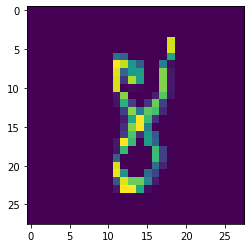

In [3]:
a=data.iloc[4,1:].values
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [4]:
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [6]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train.head()

20379    9
53032    2
27005    5
30510    0
508      8
Name: label, dtype: int64

In [8]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
pred=rf.predict(x_test)
pred

array([2, 3, 1, ..., 4, 7, 5], dtype=int64)

In [10]:
y_test[0:5]

41382    2
20883    3
13621    1
41823    3
33839    9
Name: label, dtype: int64

In [11]:
pred[0:5]

array([2, 3, 1, 3, 9], dtype=int64)

In [12]:
s=y_test.values
count=0

In [13]:
for i in range(len(pred)):
    if pred[i]==s[i]:
        count=count+1

In [14]:
count

11755

In [15]:
len(pred)

12000

In [16]:
8076/8400.0

0.9614285714285714

In [17]:
z=data.iloc[32000:32003,1:]
z

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
rf.predict(z)

array([0, 1, 2], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
accuracy_score(y_test,pred)

0.9795833333333334

In [21]:
confusion_matrix(y_test,pred)

array([[1148,   19,    0,    4,    1,    0,    1,    0,    1,    0],
       [   3, 1203,    0,    1,    0,    1,    0,    0,    1,    3],
       [   7,    0, 1227,    5,    0,    0,    0,    0,    0,    0],
       [  10,    0,    0, 1165,    6,    4,    0,    9,    0,    0],
       [   1,    0,    0,    4, 1179,   11,    0,    0,    3,    4],
       [   0,    0,    0,    6,    9, 1160,    0,    0,    3,    0],
       [   0,    0,    0,    9,    0,    0, 1181,   20,    0,    4],
       [   1,    2,    0,   15,    8,    1,   33, 1170,    1,    0],
       [   3,    1,    0,    0,    0,    2,    0,    0, 1168,    1],
       [   1,    0,    0,    3,    4,    0,   11,    7,    1, 1154]],
      dtype=int64)

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1174
           1       0.98      0.99      0.99      1212
           2       1.00      0.99      1.00      1239
           3       0.96      0.98      0.97      1194
           4       0.98      0.98      0.98      1202
           5       0.98      0.98      0.98      1178
           6       0.96      0.97      0.97      1214
           7       0.97      0.95      0.96      1231
           8       0.99      0.99      0.99      1175
           9       0.99      0.98      0.98      1181

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [23]:
df=pd.read_csv('E:/Data Science SP/Machine Learning/Kannada MNIST/test.csv')
df1=df.iloc[500:510,1:]
df1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.shape

(5000, 785)

In [25]:
rf.predict(df1)

array([3, 5, 4, 7, 9, 2, 2, 4, 6, 7], dtype=int64)